In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
drivers = pd.read_csv('data/drivers.csv')
drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [4]:
constructors = pd.read_csv('data/constructors.csv')
constructors.head()

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [5]:
races = pd.read_csv('data/races.csv')
races.drop('url', axis = 1)
races.head()

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [6]:
qualifying = pd.read_csv('data/qualifying.csv')
qualifying.head()

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236


## Constructors in Qualifying:
- No. of Poles
- No. of Front Rows

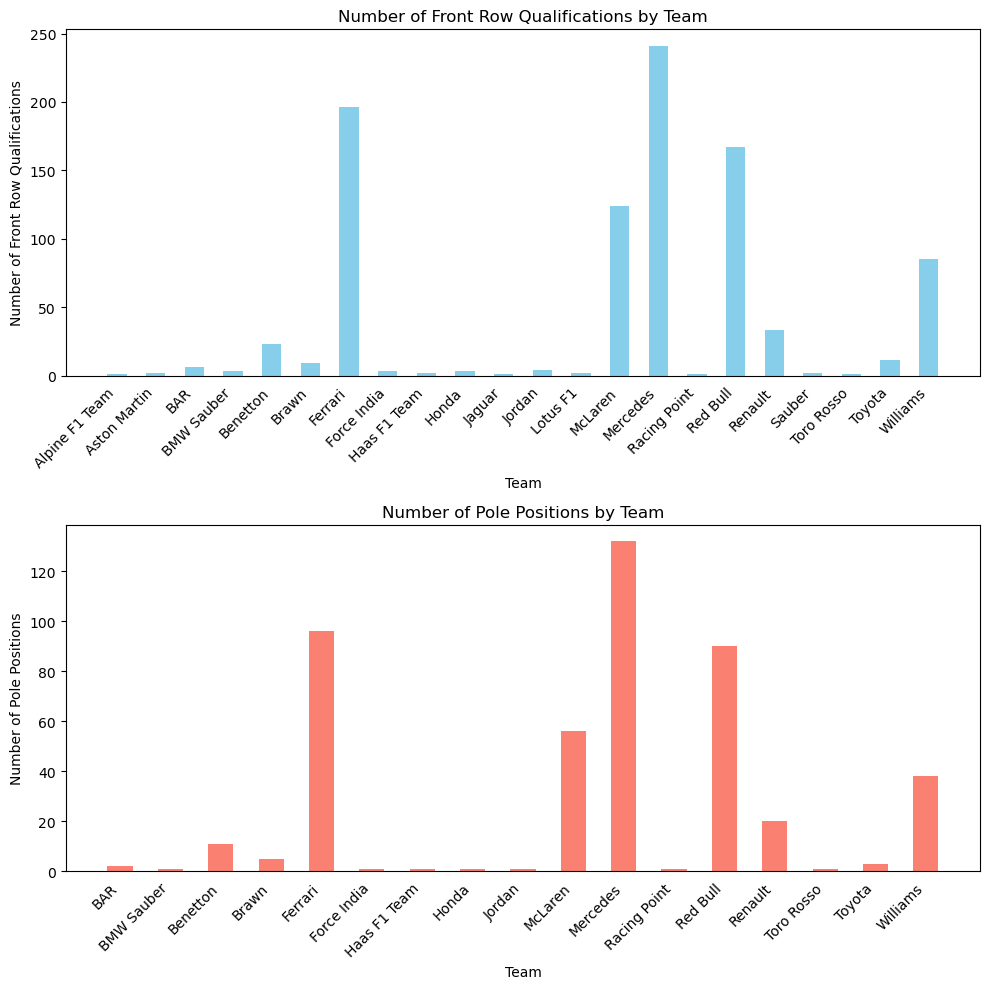

In [10]:
merged_df = qualifying.merge(constructors, on='constructorId', how='left')

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

result_front_row = merged_df[(merged_df['position'] == 1) | (merged_df['position'] == 2)]['name'].value_counts().sort_index()

bar_width = 0.5
bar_positions = np.arange(len(result_front_row))
ax1.bar(bar_positions, result_front_row.values, color='skyblue', width=bar_width)
ax1.set_xlabel('Team')
ax1.set_ylabel('Number of Front Row Qualifications')
ax1.set_title('Number of Front Row Qualifications by Team')
ax1.set_xticks(bar_positions)
ax1.set_xticklabels(result_front_row.index, rotation=45, ha='right')
ax1.tick_params(axis='x', which='both', bottom=False, top=False)

result_pole = merged_df[(merged_df['position'] == 1)]['name'].value_counts().sort_index()

bar_positions = np.arange(len(result_pole))
ax2.bar(bar_positions, result_pole.values, color='salmon', width=bar_width)
ax2.set_xlabel('Team')
ax2.set_ylabel('Number of Pole Positions')
ax2.set_title('Number of Pole Positions by Team')
ax2.set_xticks(bar_positions)
ax2.set_xticklabels(result_pole.index, rotation=45, ha='right')
ax2.tick_params(axis='x', which='both', bottom=False, top=False)

plt.tight_layout()
plt.show()


## Most races won
- driver
- constructor

In [8]:
race_results = pd.read_csv('data/results.csv')
race_results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


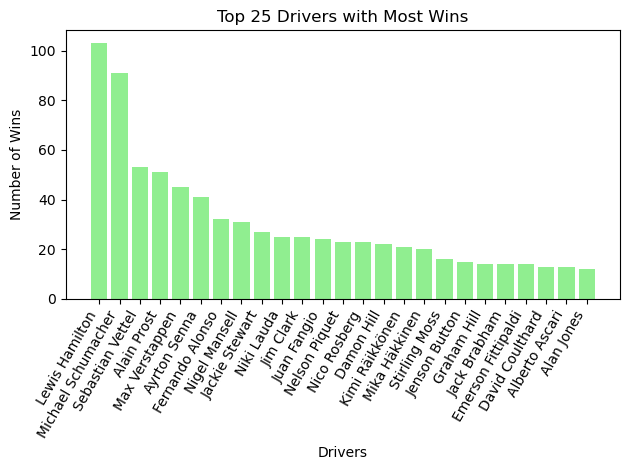

In [9]:
merged_result_driver = race_results.merge(drivers, on='driverId', how='left')

df = merged_result_driver[merged_result_driver['positionText'] == '1'][['forename', 'surname']]

df['fullname'] = df['forename'] + " " + df['surname']

df_val = df['fullname'].value_counts().head(25)

plt.bar(df_val.index, df_val.values,color = 'LightGreen')
plt.xticks(rotation=60,ha = 'right')
plt.xlabel('Drivers')
plt.ylabel('Number of Wins')
plt.title('Top 25 Drivers with Most Wins')
plt.tight_layout()
plt.show()


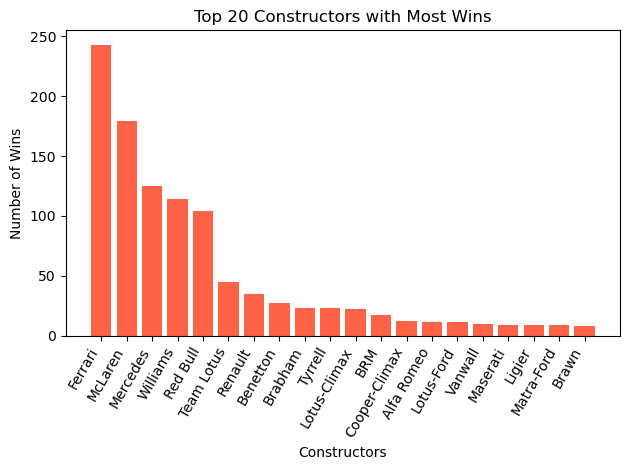

In [20]:
merged_result_contructor = race_results.merge(constructors, on='constructorId', how='left')

df = merged_result_contructor[merged_result_contructor['positionText'] == '1']

df_val = df['name'].value_counts().head(20)

plt.bar(df_val.index, df_val.values,color = 'tomato')
plt.xticks(rotation=60,ha = 'right')
plt.xlabel('Constructors')
plt.ylabel('Number of Wins')
plt.title('Top 20 Constructors with Most Wins')
plt.tight_layout()
plt.show()
